In [36]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
patterns = [
    ('output-opt-1.3b-opt-2.7b-0.5-{i}-200', 'OPT-2.7B'),
    ('output-Mistral-7B-v0.1-Llama-2-7b-hf-0.5-{i}-300', 'Llama-2-7b'),
    ('output-Llama-2-7b-hf-Mistral-7B-v0.1-0.5-{i}-300', 'Mistral-7B')
]

In [83]:
data = []

In [84]:
# 遍历每个文件夹模式
for pattern, source in patterns:
    # 遍历每个子文件夹
    for i in range(11):
        folder_name = pattern.format(i=i)
        file_path = os.path.join(folder_name, 'gen_table_w_metrics.jsonl')
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                for line in file:
                    record = json.loads(line)
                    if 'w_bl_ppl' in record and not pd.isna(record['w_bl_ppl']):
                        data.append({
                            'model': source,
                            'i': i,
                            'w_bl_ppl': record['w_bl_ppl']
                        })


In [85]:
# 将数据转换为DataFrame
df = pd.DataFrame(data)

In [86]:
df = df.dropna(subset=['w_bl_ppl'])
df

,model,i,w_bl_ppl
0,OPT-2.7B,0,1.439376
1,OPT-2.7B,0,3.267914
2,OPT-2.7B,0,1.191975
3,OPT-2.7B,0,1.592527
4,OPT-2.7B,0,1.653367
...,...,...,...
652,Mistral-7B,10,9.731156
653,Mistral-7B,10,9.299810
654,Mistral-7B,10,22.613012
655,Mistral-7B,10,9.767824


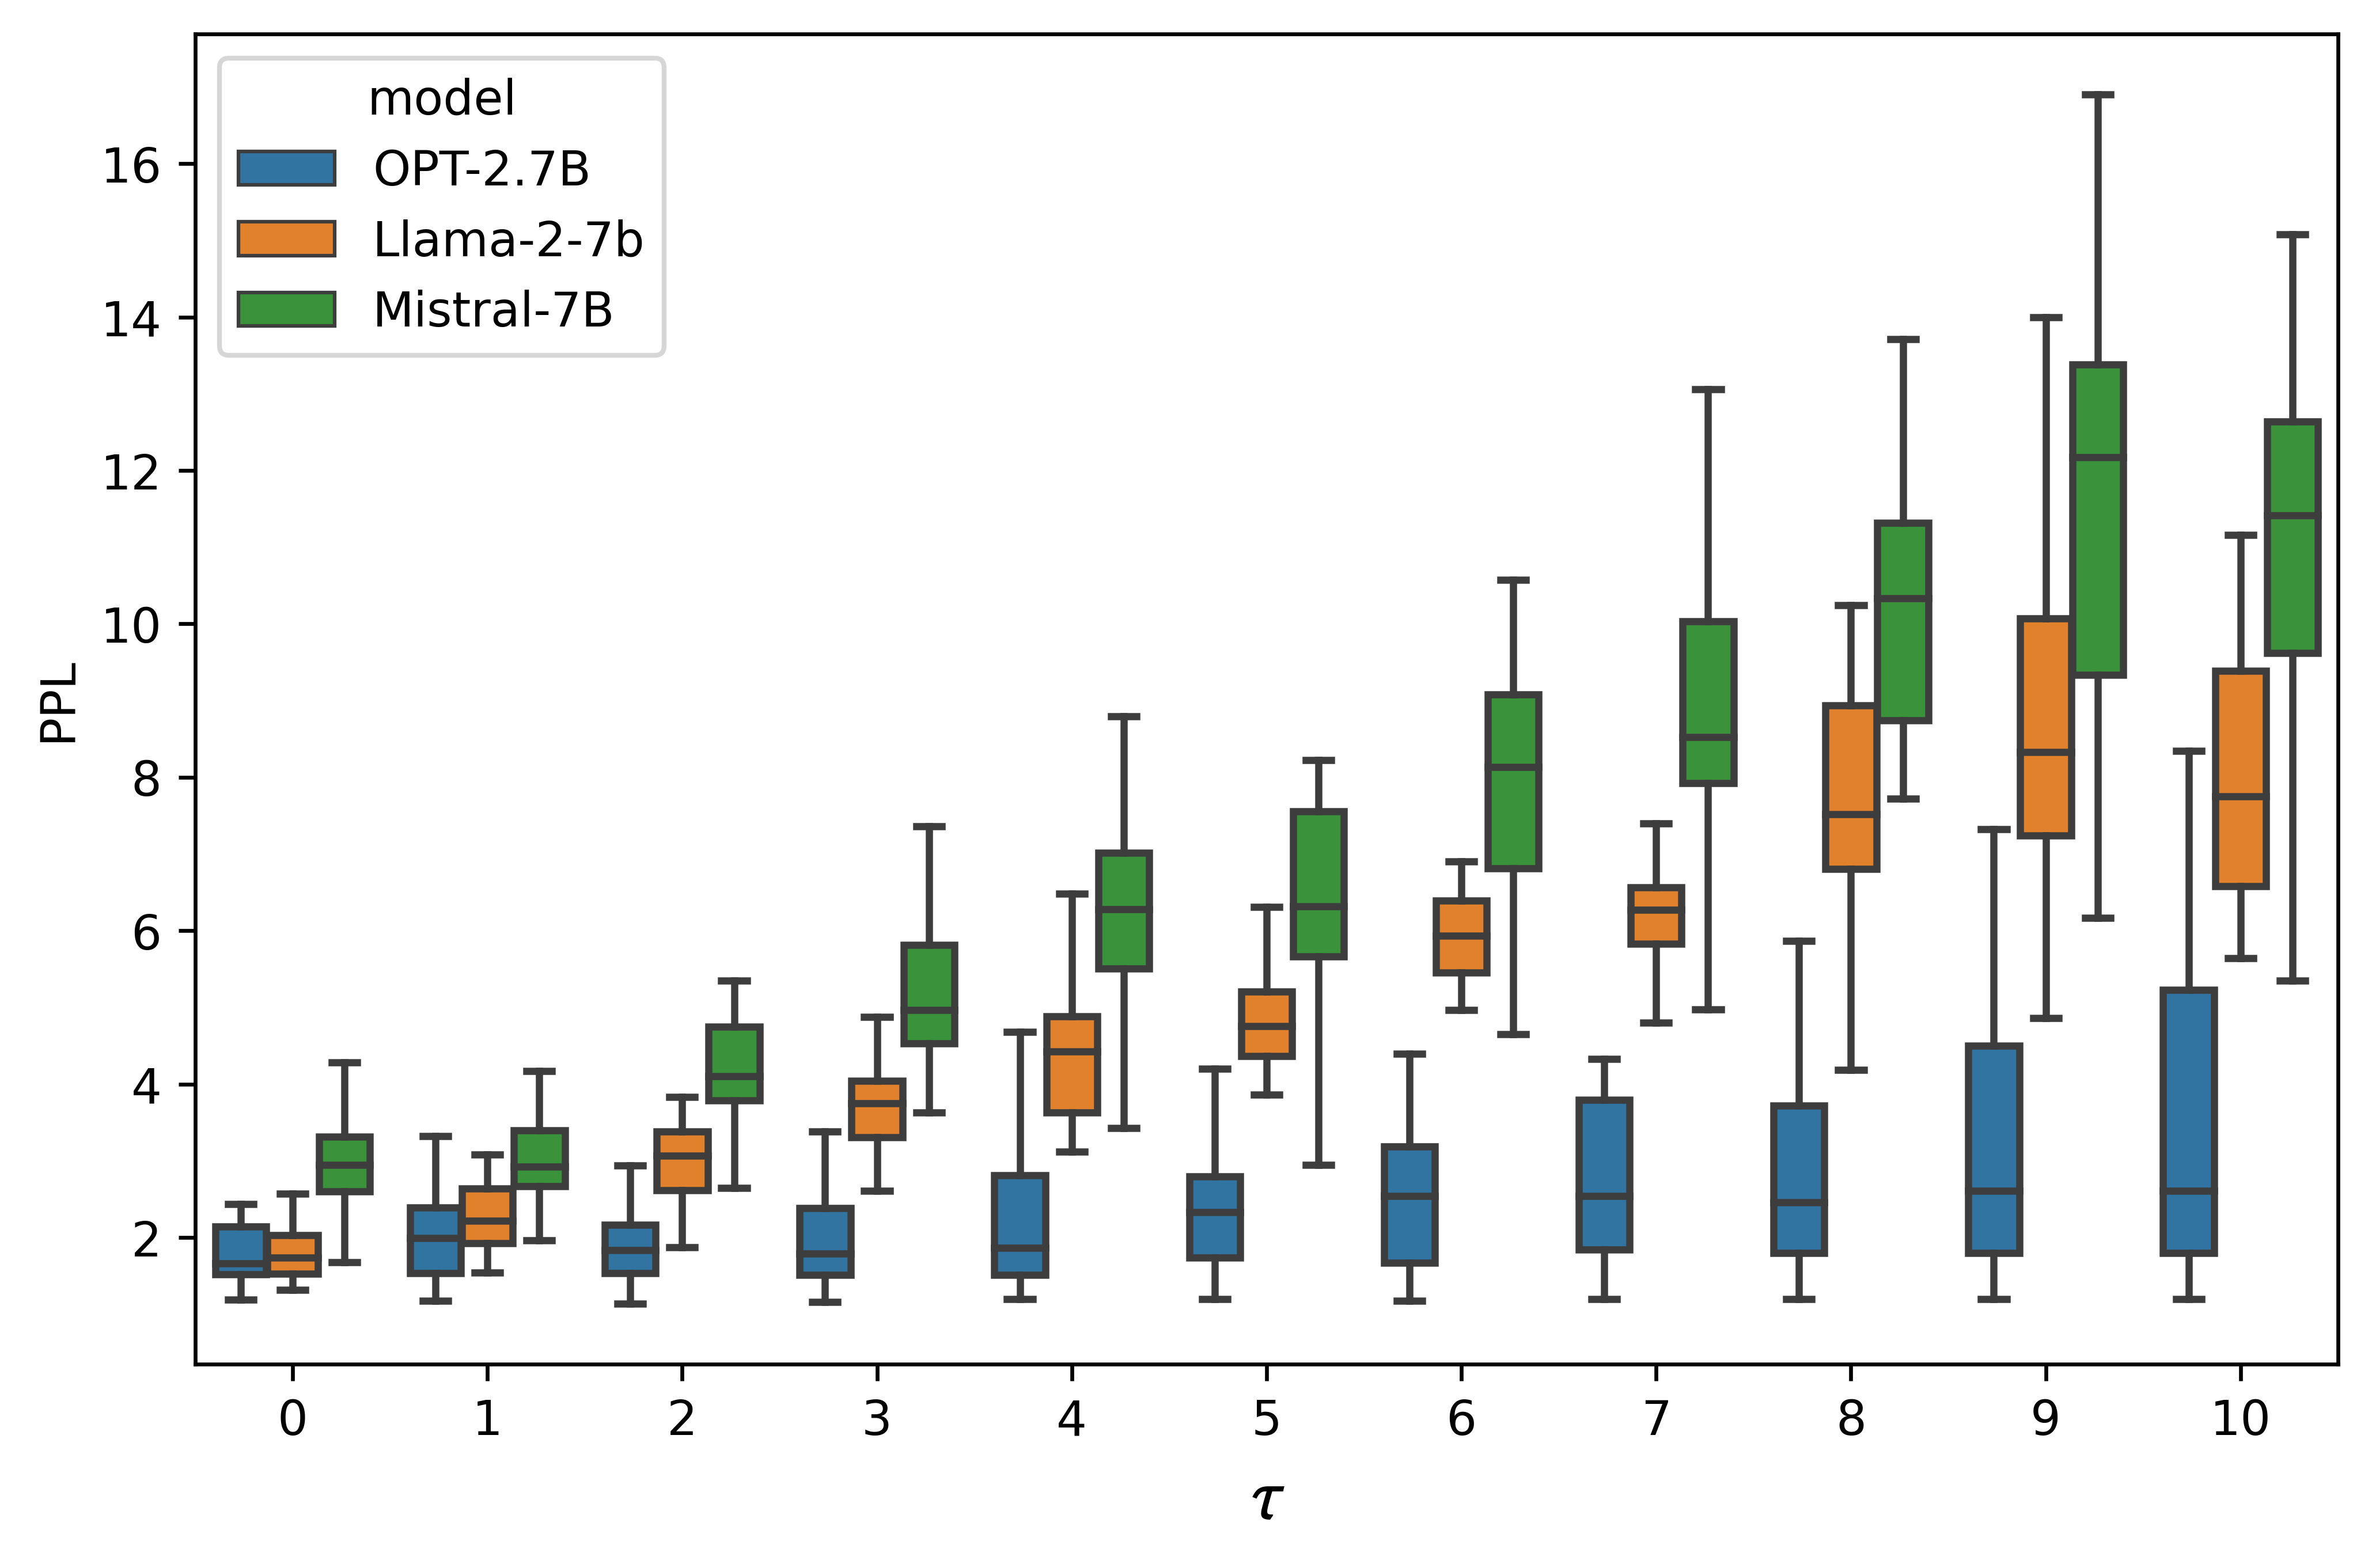

In [98]:
plt.figure(figsize=(8, 5),dpi=600)
sns.boxplot(x='i', y='w_bl_ppl', showfliers=False, hue='model', data=df)
plt.xlabel('i')
plt.xlabel(r"$\mathbb{\tau}$",fontsize=15)
plt.ylabel('PPL',fontsize=10)
plt.savefig('PPL_three.png')
plt.show()